# Import Library

In [1]:
import numpy as np
import  pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Data Acquisition

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Pre-Process

In [4]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert the species column to integer labels
df['species_label'] = label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [5]:
# Columns where you want to change the value from 2 to 1
columns_to_change = ['species_label']

# Change value from 2 to 1 in specified columns
df[columns_to_change] = df[columns_to_change].replace(2, 1)

In [6]:
X1 = df.drop(columns=['Species'])
y1 = df['Species']

In [7]:
y1.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [8]:
X1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_label
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
y = df['species_label'].values  # Use the new integer label column
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Train Test Split

In [10]:
X_train, X_test, y_train , y_test = train_test_split(X1,y, test_size=0.2, random_state=42)

In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert the species column to integer labels
df['species_label'] = label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


Make it Binary only 0 or 1

In [12]:
# Columns where you want to change the value from 2 to 1
columns_to_change = ['species_label']

# Change value from 2 to 1 in specified columns
df[columns_to_change] = df[columns_to_change].replace(2, 1)

In [13]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_label
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1
149,150,5.9,3.0,5.1,1.8,Iris-virginica,1


In [14]:
# Extract features and target from DataFrame
X = df[['SepalLengthCm', 'SepalWidthCm']].values  # Replace with your feature columns
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [15]:
y = df['species_label'].values  # Use the new integer label column
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
class Perceptron:
    def __init__(self, learning_rate=0.5, max_epochs=100):
        self.w = None
        self.b = None
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.max_epochs):
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                update = self.learning_rate * (yi - y_pred)
                self.w += update * xi
                self.b += update

    def predict(self, X):
        X = np.array(X, dtype=float)
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output > 0, 1, 0)

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLP
mlp = Perceptron()
mlp.fit(X_train,y_train)

# Make predictions on the test set
predictions = mlp.predict(X_test)
print("Predictions:", predictions.flatten())
print("True labels:", y_test)

# Step 10: Evaluate the model
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # print("\nConfusion Matrix:")
    # print(conf_matrix)
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate the performance of the model
evaluate_model(y_test, predictions)

Predictions: [1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]
True labels: [1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



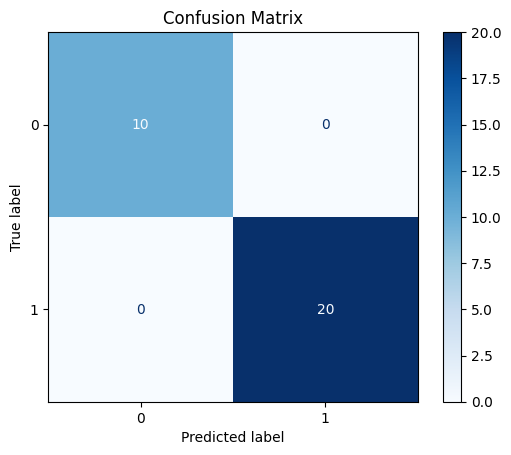

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions.flatten())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()


# Linear Regression

In [20]:
# Step 1: Load the Iris dataset (from CSV)
df = pd.read_csv('iris.csv')

In [21]:
# Step 2: Filter the dataset to only include Setosa and Versicolor
df = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Step 3: Prepare the features and labels
X = df.drop(columns=['Species']).values  # Features: all columns except 'species'
y = df['Species'].apply(lambda x: 1 if x == 'Iris-versicolor' else 0).values  # Binary labels (1 for Versicolor, 0 for Setosa)

In [24]:
# Step 4: Standardize the features (important for convergence)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 6: Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
# Step 7: Implementing Linear Regression for binary classification
class LinearRegressionBinaryClassifier:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        m = X.shape[0]
        
        # Gradient Descent
        for epoch in range(self.epochs):
            # Linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get probabilities
            y_predicted = sigmoid(linear_model)
            
            # Compute gradients
            dw = (1/m) * np.dot(X.T, (y_predicted - y))
            db = (1/m) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        # Convert probabilities to binary output (1 or 0)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)



In [28]:
# Step 8: Train the model
classifier = LinearRegressionBinaryClassifier(learning_rate=0.01, epochs=1000)
classifier.fit(X_train, y_train)

In [29]:
# Step 9: Make predictions
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [30]:
# Step 10: Evaluate the model
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(f"Train Accuracy: {accuracy(y_train, y_pred_train):.2f}")
print(f"Test Accuracy: {accuracy(y_test, y_pred_test):.2f}")



Train Accuracy: 1.00
Test Accuracy: 1.00


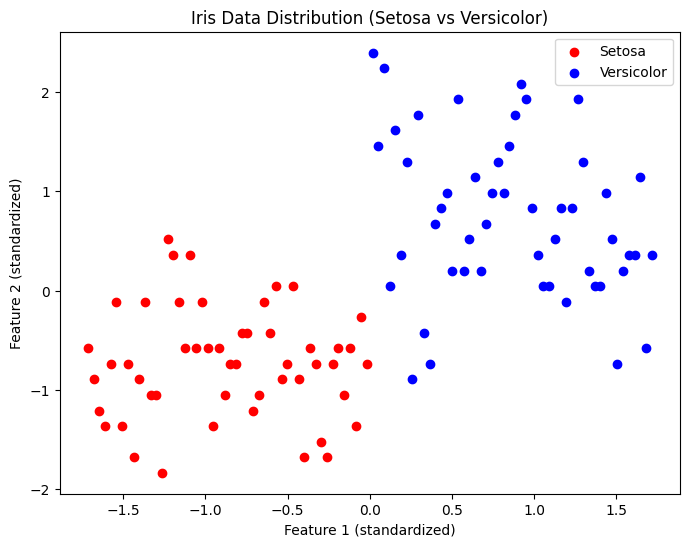

In [31]:
# 1. Scatter plot of data distribution
def plot_data_distribution(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Setosa')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Versicolor')
    plt.title('Iris Data Distribution (Setosa vs Versicolor)')
    plt.xlabel('Feature 1 (standardized)')
    plt.ylabel('Feature 2 (standardized)')
    plt.legend()
    plt.show()

plot_data_distribution(X, y)

In [32]:
# 2. Decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Setosa')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Versicolor')
    
    # Create a grid to evaluate the model
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdBu)
    
    plt.title('Decision Boundary (Setosa vs Versicolor)')
    plt.xlabel('Feature 1 (standardized)')
    plt.ylabel('Feature 2 (standardized)')
    plt.legend()
    plt.show()


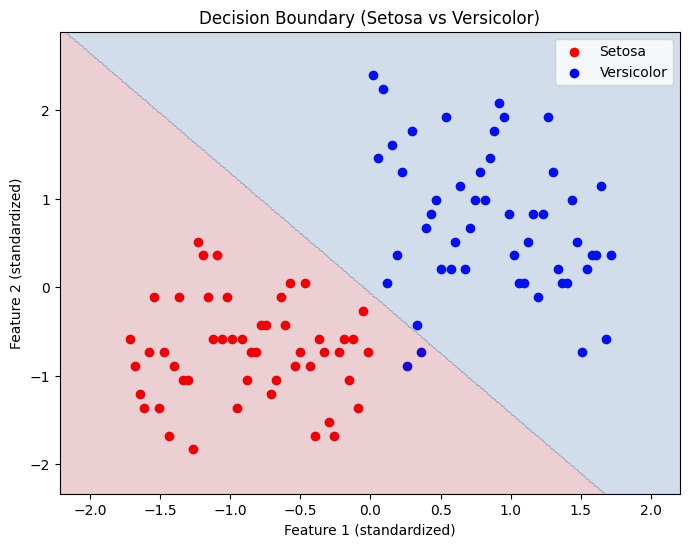

In [33]:
# We'll use only the first two features for visualization purposes
X_two_features = X[:, :2]

# Split the two-feature data into training and testing sets
X_train_2f, X_test_2f, y_train, y_test = train_test_split(X_two_features, y, test_size=0.2, random_state=42)

# Train the model again with the first two features
classifier_2f = LinearRegressionBinaryClassifier(learning_rate=0.01, epochs=1000)
classifier_2f.fit(X_train_2f, y_train)

# Now we can plot the decision boundary using the classifier trained on the first two features
plot_decision_boundary(X_two_features, y, classifier_2f)
